In [104]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

train_df = pd.read_csv('train.csv',header=0)
test_df = pd.read_csv('test.csv',header=0)


In [110]:
train_df.info()

# df['Name'][0]
# df.Survived.value_counts()
print("##MALE FEMALLE COUNT########")
train_df.Sex.value_counts()
# print("##CABIN########")
# train_df.Cabin.value_counts()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
##MALE FEMALLE COUNT########
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare

In [113]:

# train_df.head()
# train_df.tail()
# print (test_df.info())


train_df.describe()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## checking the relation of Passenger class with the survival
* we gonna check this for the columns that has discrete value
* Categorical: Sex and Embarked (string)
* Continuous: Age, Fare. 
* Discrete: SibSp, Parch, Survived,  Pclass(Integer)

In [114]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [115]:
train_df[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


   SibSp  Survived
0      0       210
1      1       112
2      2        13
3      3         4
4      4         3
5      5         0
6      8         0
    SibSp     Sex  Pclass
0       0  female     174
1       0    male     434
2       1  female     106
3       1    male     103
4       2  female      13
5       2    male      15
6       3  female      11
7       3    male       5
8       4  female       6
9       4    male      12
10      5  female       1
11      5    male       4
12      8  female       3
13      8    male       4
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


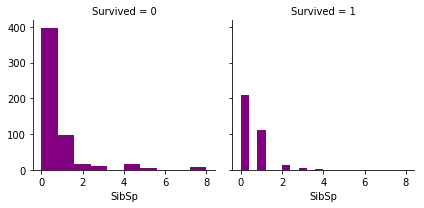

In [116]:
Sibsp = train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).sum().sort_values(by='Survived', ascending=False)
print (Sibsp)
Sib_no = train_df[["SibSp", "Sex","Pclass"]].groupby(['SibSp','Sex'], as_index=False).count()
print (Sib_no)
Sibsp_mean = train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print (Sibsp_mean)
g = sns.FacetGrid(train_df, col="Survived", margin_titles=True)
g.map(plt.hist, "SibSp",color="purple");

#### Observation
* Passenger survived with 0 SibSp is high also people dying with 0 SibSp is high
* But Survival percentage of passenge with 1 SibSp is high 

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


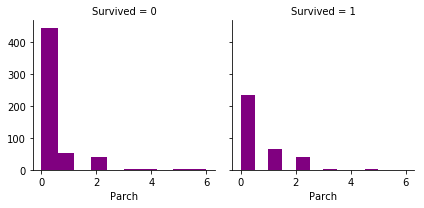

In [117]:
Parch_mean = train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print (Parch_mean)
g = sns.FacetGrid(train_df, col="Survived", margin_titles=True)
g.map(plt.hist, "Parch",color="purple");
# Parch_surv = train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).sum()
# print(Parch_surv)
# plt.axis("equal")
# plt.pie(Parch_surv['Survived'],labels= Parch_surv['Parch'],autopct="%1.1f%%") 
# plt.title("Parch vs survival")
# plt.show()

#### Observation
* Survival of Passenger with 3 Parch is high.

## Visualising Data

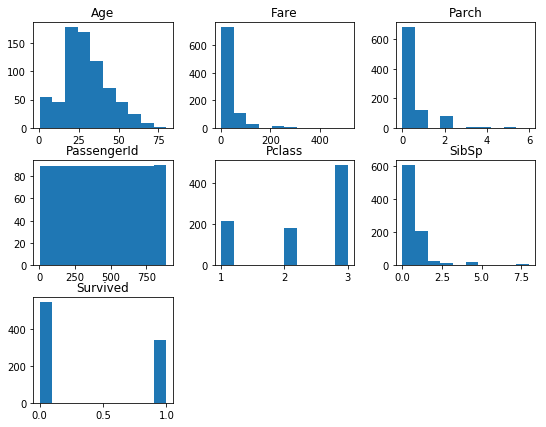

In [118]:
# g = sns.FacetGrid(train_df)
# g.map(plt.hist, bins=20)

# showing the distribution of columns in the training data.
# displays count on the y axis and values on the x axis
# only displayed for the column wit integer values
train_df.hist(bins=10,figsize=(9,7),grid=False);

Here we see that the values in the colms are in different ranges. Check out the Age and fare graph. Age has max value 75 and fare has 300-400.
#### we need to normalize the data i.e, bring the data to same scale . why?
* 

   Pclass  PassengerId
0       1          216
1       2          184
2       3          491
<class 'pandas.core.series.Series'>


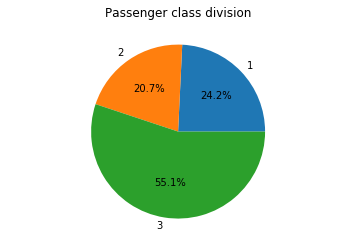

In [119]:
var = train_df[["Pclass", "PassengerId"]].groupby(['Pclass'], as_index=False).count()
print (var)
x_list = var['PassengerId']
print(type(x_list))
label_list = var['Pclass']
plt.axis("equal") #The pie chart is oval by default. To make it a circle use pyplot.axis("equal")
#To show the percentage of each pie slice, pass an output format to the autopct parameter 
plt.pie(x_list,labels=label_list,autopct="%1.1f%%") 
plt.title("Passenger class division")
plt.show()

#### Observation
* Number of people in Pclass 3 > 2 > 1

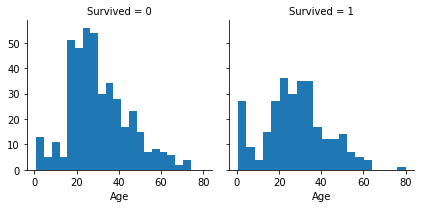

In [120]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

#### Observation
* No of people in the age group 20-35 survived than any other age group.
* Also the no. of people in same the same age-group died more.
* From this we can say that Age can't solely decide who lives or dies !!

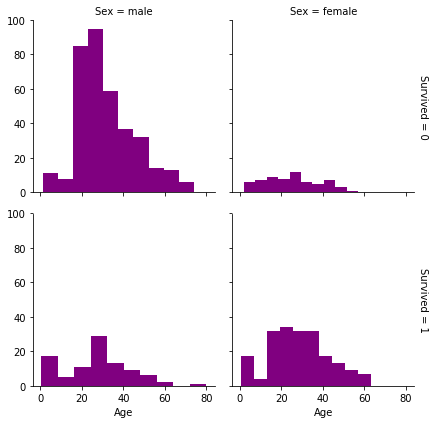

In [121]:
# g = sns.FacetGrid(train_df, col='Survived')
# g.map(plt.hist, 'Age', bins=20)

# OR
g = sns.FacetGrid(train_df, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="purple");
# train_df[["Sex","Age","PassengerId"]].groupby(["Age","Sex"]).count()

#### Observation
* Here we check feature: "Sex" along with the Age to find out to what extent we can determine survival using the two.
* we observe that for a male, no of death is pretty high (first row). 
* whereas in case of survival, female survival is high for the age group of (15-35).
* also the no of male survival in the age group 25-30 is high.
* also no of infants surviving is high in both gender.

#### Conclusion
* Can use Sex and Age to determine the survival of passenger.
* can use Age range and sex to predict.


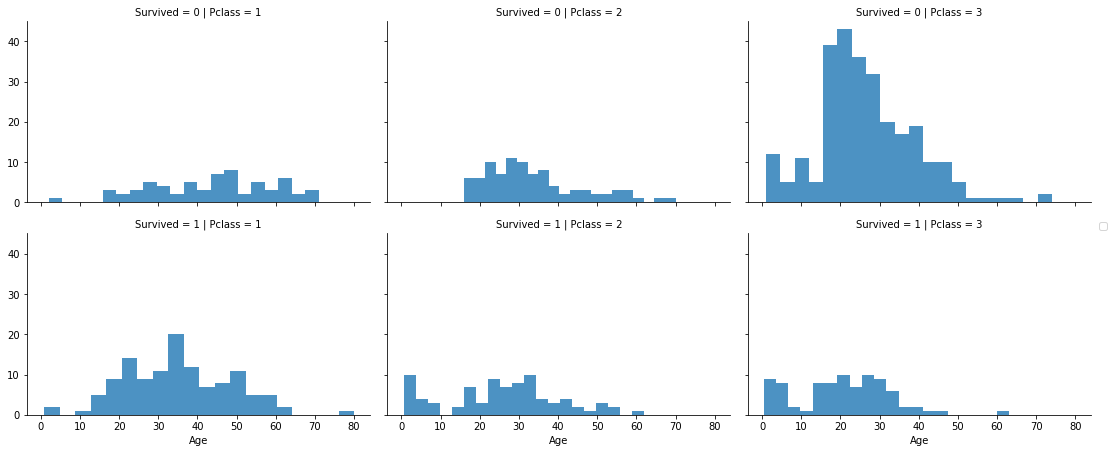

In [122]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, row='Survived', col='Pclass', size=3.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.8, bins=20)
grid.add_legend();

#### Observation
* it tells us "if Pclass is 1 and survival is 0 what is the age distribution"
* No. of passenger not surving and belonging to class 3 is high
* passenger of class 1 survived in large no. compared to other class.
* also the age group 33-37 of 1st class survivng is more significant. 

* plt.hist cant be used to show the distribution of a discrete variable on the x axis(like pclass) . However since Age is continuos(as it is int type whereas Embarked is string type)
* Can use barplot for discrete data ( like Embarked which has string values)

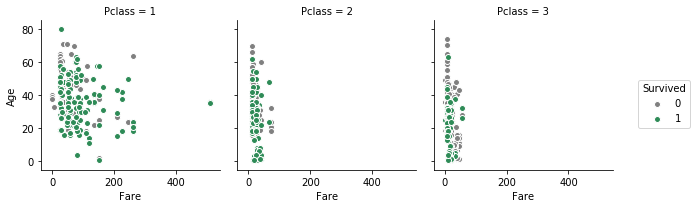

In [123]:
g = sns.FacetGrid(train_df, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

#### Observation
* check that passenger of the 1st class who paid high fare i.e, >200 almost survived.
* we cant detemine srvival based on only fare and Pclass except the case where fare is high.

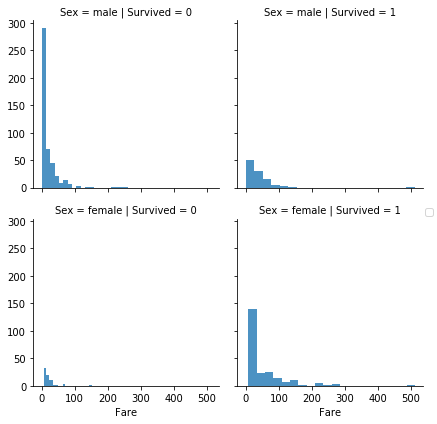

In [124]:
grid = sns.FacetGrid(train_df, col='Survived',row="Sex")##check that the graph is displayed in matrix form
grid.map(plt.hist, 'Fare', alpha=.8, bins=20)
grid.add_legend();

### Observation
* no of male passenger surving who gave low fare is low( check the fist two graph)
* no of female passenger surving with giving high} ( check the last two)

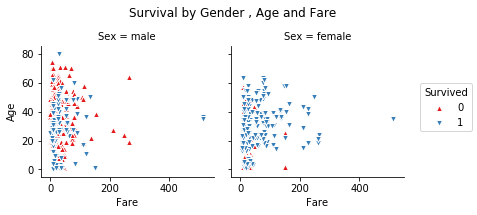

In [125]:
g = sns.FacetGrid(train_df, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare');

#### Observation
* we see that female population surviving is high
* Also passenger giving high fare survived and also most of them were female.

In [126]:
train_df[["Embarked","Survived","Pclass"]].groupby(['Embarked','Pclass']).mean()
# train_df[["Embarked","Survived"]].groupby(['Embarked'], as_index=False).count()


Survived
Embarked Pclass          
C        1       0.694118
         2       0.529412
         3       0.378788
Q        1       0.500000
         2       0.666667
         3       0.375000
S        1       0.582677
         2       0.463415
         3       0.189802

In [127]:
train_df[["Embarked","Survived","Pclass"]].groupby(['Embarked','Pclass']).std()

Survived
Embarked Pclass          
C        1       0.463515
         2       0.514496
         3       0.488802
Q        1       0.707107
         2       0.577350
         3       0.487520
S        1       0.495070
         2       0.500187
         3       0.392701

Fare
Embarked Sex    Survived           
C        female 0         16.215278
                1         83.460286
         male   0         38.065342
                1         71.468545
Q        female 0         10.904633
                1         13.211733
         male   0         13.911732
                1         12.916667
S        female 0         25.728508
                1         44.596518
         male   0         19.881281
                1         30.366286

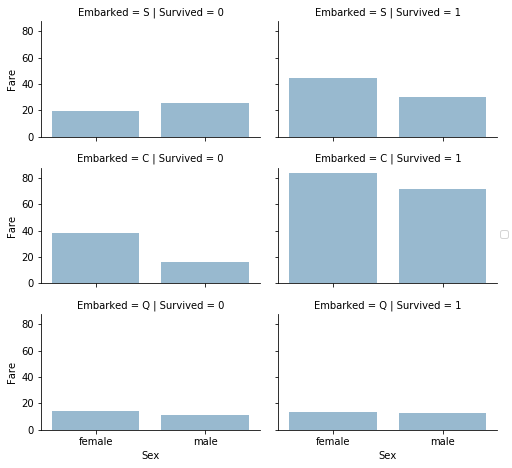

In [128]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()
train_df[['Embarked','Survived','Sex','Fare']].groupby(['Embarked','Sex','Survived']).mean()

__Cant understand__ the above plot. first column graph seems wrong. the avg fare given by male (from embarked =S and not survived ) is 19.8 whereas for female in same caegory is 25.7. 

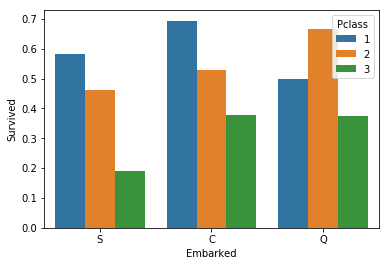

In [129]:
sns.barplot(x="Embarked", y="Survived", hue="Pclass", data=train_df,ci=None);
#Ci is for removing the line (dont know what it is for)

#### Observaion
* Can see here that "Emabarked" is an important feature 
* can use bar plot or point plot to display discrete data (dont know what the vertical line represents)
* Passenger who survived the most belonged to port "C" for 1st class.
* Passenger of 2nd class survived more who boarde from port "Q"

Survived
Embarked Sex             
C        female  0.876712
         male    0.305263
Q        female  0.750000
         male    0.073171
S        female  0.689655
         male    0.174603

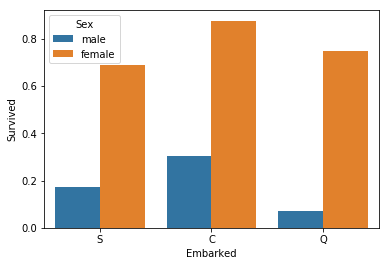

In [130]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=train_df,ci=None);
train_df[["Embarked","Survived", "Sex"]].groupby(['Embarked','Sex']).mean()

#### Observation
* Clearly female ruled Titanic !
* Also survival percentage of Male is high for the passenger boarding from Port "C".

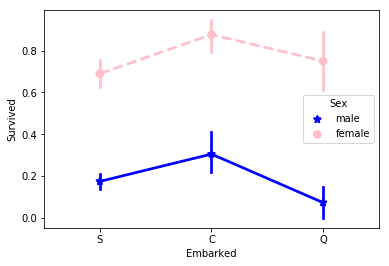

In [131]:
sns.pointplot(x="Embarked", y="Survived", hue="Sex", data=train_df,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);

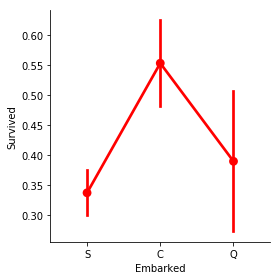

In [132]:
sns.factorplot(x = 'Embarked',y="Survived", data = train_df,color="r");

#### Dont know what vertical line is for

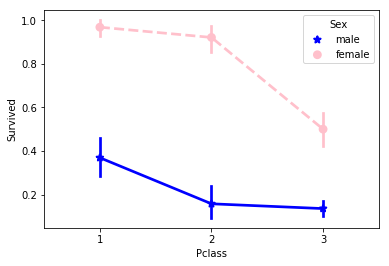

In [133]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=train_df,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);

In [134]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Engineering

#### Dropped column cabin and ticket
#### Repalcing Parch and SibSp with Family size 

In [135]:
# ParSib = train_df[["Parch","SibSp", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# print (Parch_mean)
train_df['family_Size'] = train_df['Parch'] + train_df['SibSp'] + 1
test_df['family_Size'] = test_df['Parch'] + test_df['SibSp'] + 1
train_df[['family_Size','Survived']].groupby('family_Size').mean()
train_df['family_Size'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family_Size, dtype: int64

In [138]:
test_df['family_Size'] = test_df['Parch'] + test_df['SibSp'] + 1
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
family_Size    418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [139]:
combine = [train_df, test_df]
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin','Parch','SibSp'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin','Parch','SibSp'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape


Before (891, 13) (418, 12) (891, 13) (418, 12)


('After', (891, 9), (418, 8), (891, 9), (418, 8))

In [103]:
a = [1,2]
b = [3,4]
c = [a,b]

print(c)
for item in c:
    item = item.append(5)
print (a,b)
a.append(6)
print (c)

[[1, 2], [3, 4]]
[1, 2, 5] [3, 4, 5]
[[1, 2, 5, 6], [3, 4, 5]]


In [143]:
train_df.head()
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,family_Size
0,892,3,"Kelly, Mr. James",male,34.5,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,7.0000,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,12.2875,S,3


In [144]:
print (type(train_df['Name']))
train_df['Name'].str
# for item in train_df['Name']:
#     print (item)
    
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])



<class 'pandas.core.series.Series'>


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We see here that Master,Miss,Mr,Mrs are in large number and others are very less. So lets classify the data into these four along with common title for the remaining ones i.e, Rare

In [145]:
train_df[['Title','Survived','PassengerId']].groupby(['Title','Survived']).count()

PassengerId
Title    Survived             
Capt     0                   1
Col      0                   1
         1                   1
Countess 1                   1
Don      0                   1
Dr       0                   4
         1                   3
Jonkheer 0                   1
Lady     1                   1
Major    0                   1
         1                   1
Master   0                  17
         1                  23
Miss     0                  55
         1                 127
Mlle     1                   2
Mme      1                   1
Mr       0                 436
         1                  81
Mrs      0                  26
         1                  99
Ms       1                   1
Rev      0                   6
Sir      1                   1

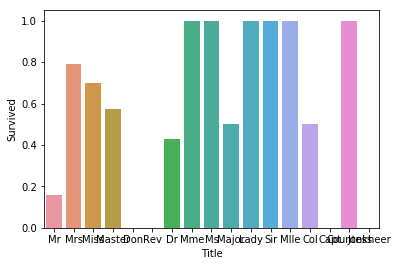

In [146]:
sns.barplot(x="Title", y="Survived", data=train_df,ci=None);

In [147]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona','Mlle','Ms','Mme'], 'Rare')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


,Title,Survived
0,Master,0.575000
1,Miss,0.697802
2,Mr,0.156673
3,Mrs,0.792000
4,Rare,0.444444


In [149]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
Fare           417 non-null float64
Embarked       418 non-null object
family_Size    418 non-null int64
Title          418 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 29.5+ KB


Now we convert these categorical title ordinal(in other words mapping to number)

In [155]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family_Size,Title
0,0,3,0,22.0,7.2500,S,2,1
1,1,1,1,38.0,71.2833,C,2,3
2,1,3,1,26.0,7.9250,S,1,2
3,1,1,1,35.0,53.1000,S,2,3
4,0,3,0,35.0,8.0500,S,1,1


In [156]:
train_df.info() , test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            714 non-null float64
Fare           891 non-null float64
Embarked       889 non-null object
family_Size    891 non-null int64
Title          891 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass         418 non-null int64
Sex            418 non-null int64
Age            332 non-null float64
Fare           417 non-null float64
Embarked       418 non-null object
family_Size    418 non-null int64
Title          418 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 22.9+ KB


(None, None)

* Dropping Name and PassengerId column which are of no use
* Also mapping string value of Sex to integer 
* Cant map "Embarked" with integer since it is not complete

In [151]:
train_df= train_df.drop(['Name','PassengerId'], axis=1)
test_df= test_df.drop(['Name','PassengerId'], axis=1)
combine = [train_df,test_df]
train_df.head()
# test_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family_Size,Title
0,0,3,male,22.0,7.2500,S,2,Mr
1,1,1,female,38.0,71.2833,C,2,Mrs
2,1,3,female,26.0,7.9250,S,1,Miss
3,1,1,female,35.0,53.1000,S,2,Mrs
4,0,3,male,35.0,8.0500,S,1,Mr


In [157]:
test_df.head()


,Pclass,Sex,Age,Fare,Embarked,family_Size,Title
0,3,0,34.5,7.8292,Q,1,1
1,3,1,47.0,7.0000,S,2,3
2,2,0,62.0,9.6875,Q,1,1
3,3,0,27.0,8.6625,S,1,1
4,3,1,22.0,12.2875,S,3,3


In [158]:
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,family_Size,Title
0,3,0,34.5,7.8292,Q,1,1
1,3,1,47.0,7.0000,S,2,3
2,2,0,62.0,9.6875,Q,1,1
3,3,0,27.0,8.6625,S,1,1
4,3,1,22.0,12.2875,S,3,3


In [153]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head() ,test_df.head() 

(   Survived  Pclass  Sex   Age     Fare Embarked  family_Size Title
 0         0       3    0  22.0   7.2500        S            2    Mr
 1         1       1    1  38.0  71.2833        C            2   Mrs
 2         1       3    1  26.0   7.9250        S            1  Miss
 3         1       1    1  35.0  53.1000        S            2   Mrs
 4         0       3    0  35.0   8.0500        S            1    Mr,
    Pclass  Sex   Age     Fare Embarked  family_Size Title
 0       3    0  34.5   7.8292        Q            1    Mr
 1       3    1  47.0   7.0000        S            2   Mrs
 2       2    0  62.0   9.6875        Q            1    Mr
 3       3    0  27.0   8.6625        S            1    Mr
 4       3    1  22.0  12.2875        S            3   Mrs)

#### Fill the missing values in the Age column
* can be done by finding the mean and taking the no between mean and standard deviation
* can find the median of the Pclass data for both male and female 
* or combining both 1 and 2 i.e finding the mean and SD and taking a random value for male and female

In [159]:
### Finding Mean, Median, SD
median = train_df[['Pclass','Sex','Age']].groupby(['Pclass','Sex']).median()
mean = train_df[['Pclass','Sex','Age']].groupby(['Pclass','Sex']).mean()
sd = train_df[['Pclass','Sex','Age']].groupby(['Pclass','Sex']).std()
print (mean,median,sd)

                  Age
Pclass Sex           
1      0    41.281386
       1    34.611765
2      0    30.740707
       1    28.722973
3      0    26.507589
       1    21.750000              Age
Pclass Sex      
1      0    40.0
       1    35.0
2      0    30.0
       1    28.0
3      0    25.0
       1    21.5                   Age
Pclass Sex           
1      0    15.139570
       1    13.612052
2      0    14.793894
       1    12.872702
3      0    12.159514
       1    12.729964


In [160]:
# a = train_df[(train_df['Sex']==1)]
# print (train_df.head())
# print (train_df['Sex']==1)
# train_df[[False,True,True]]
# Creating a matrix of size 2x3 that will store the median vlue for 6 combinations( Sex and Pclass)
# take care that the boolean values are in parenthesis
age_guess = np.zeros((2,3))
for dataset in combine:
    for i in range(0,2):
        for j in range(1,4):
            sex_class_df = dataset[(dataset['Sex']==i) & (dataset['Pclass']==j)]['Age'].dropna()
#             print (sex_class_df.head())
#             print (type(sex_class_df))
#             print ('Shape == ', sex_class_df.shape)
            age_guess[i,j-1] = sex_class_df.median()
#             print (i,j)
    # Now replacing the null values 
    for i in range(0,2):
        for j in range(1,4):
            dataset.loc[(dataset.Age.isnull())& (dataset.Sex == i)& (dataset.Pclass==j),'Age'] = age_guess[i,j-1]
            
dataset['Age'] = dataset['Age'].astype(int) 
        
print (age_guess)

[[ 42.  28.  24.]
 [ 41.  24.  22.]]


#### Why use Loc
`https://stackoverflow.com/questions/38886080/python-pandas-series-why-use-loc`
df[boolean_mask] is same as df[:,:]
* df.loc[row_indexer, column_index] can select rows and columns. df[indexer] can only select rows or columns depending on the type of values in indexer and the type of column values df ha

In [89]:
 df = pd.DataFrame({True:[1,2,3],False:[3,4,5],'Blah':[6,7,8]});
# df[[True]]
df.loc[:,True]

0    1
1    2
2    3
Name: True, dtype: int64

In [179]:
train_df.loc[(train_df["Embarked"].isnull())]

,Survived,Pclass,Sex,Age,Fare,Embarked,family_Size,Title


In [171]:
dataset.loc[(dataset.Embarked.isnull())]

,Pclass,Sex,Age,Fare,Embarked,family_Size,Title


In [178]:
train_df.loc[(train_df['Embarked'].isnull()),"Embarked"] = 'S' # S is highest occuring that is mode

In [180]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family_Size,Title
0,0,3,0,22.0,7.2500,S,2,1
1,1,1,1,38.0,71.2833,C,2,3
2,1,3,1,26.0,7.9250,S,1,2
3,1,1,1,35.0,53.1000,S,2,3
4,0,3,0,35.0,8.0500,S,1,1


In [181]:
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,family_Size,Title
0,3,0,34,7.8292,Q,1,1
1,3,1,47,7.0000,S,2,3
2,2,0,62,9.6875,Q,1,1
3,3,0,27,8.6625,S,1,1
4,3,1,22,12.2875,S,3,3


#### Replacing the Embarked values with integers

In [182]:
dataset = [train_df,test_df]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'C': 1, 'Q': 2, 'S':3} ).astype(int)


NameError: name 'train_head' is not defined

In [187]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family_Size,Title
0,0,3,0,-0.534891,-0.502445,3,2,1
1,1,1,1,0.668392,0.786845,1,2,3
2,1,3,1,-0.234070,-0.488854,3,1,2
3,1,1,1,0.442776,0.420730,3,2,3
4,0,3,0,0.442776,-0.486337,3,1,1


In [190]:
test_df['Fare'].mean()
test_df.loc[(test_df.Fare.isnull()),'Fare'] = test_df['Fare'].mean()

In [191]:
test_df.loc[(test_df.Fare.isnull())]

,Pclass,Sex,Age,Fare,Embarked,family_Size,Title



#### Feature Scaling

We can see that Age, Fare are measured on different scales, so we need to do Feature Scaling first before we proceed with predictions.


In [192]:
from sklearn import preprocessing

# std_scale = preprocessing.StandardScaler().fit(train_df[['Age', 'Fare']])
# train_df[['Age', 'Fare']] = std_scale.transform(train_df[['Age', 'Fare']])


std_scale = preprocessing.StandardScaler().fit(test_df[['Age', 'Fare']])
test_df[['Age', 'Fare']] = std_scale.transform(test_df[['Age', 'Fare']])


In [193]:
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,family_Size,Title
0,3,0,0.362522,-0.498407,2,1,1
1,3,1,1.359458,-0.513274,3,2,3
2,2,0,2.509769,-0.465088,2,1,1
3,3,0,-0.174289,-0.483466,3,1,1
4,3,1,-0.557726,-0.418471,3,3,3


In [195]:
train_df.corr()['Survived']

Survived       1.000000
Pclass        -0.338481
Sex            0.543351
Age           -0.059579
Fare           0.257307
Embarked      -0.167675
family_Size    0.016639
Title          0.414088
Name: Survived, dtype: float64

## Predict Survival


### logistics Linear Regression

In [200]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df
X_train.shape, Y_train.shape, X_test.shape



((891, 7), (891,), (418, 7))

In [202]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.930000000000007

In [203]:
# Support Vector Machines
from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.5

In [204]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB



knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn


87.090000000000003

In [205]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian


80.920000000000002

In [206]:
# Perceptron
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


79.799999999999997

In [207]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

81.480000000000004

In [208]:
# Stochastic Gradient Descent

from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


78.0

In [209]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

98.319999999999993

In [210]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.319999999999993

In [211]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.32
8,Decision Tree,98.32
1,KNN,87.09
0,Support Vector Machines,83.50
2,Logistic Regression,81.93
7,Linear SVC,81.48
4,Naive Bayes,80.92
5,Perceptron,79.80
6,Stochastic Gradient Decent,78.00
